In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt 
#import the libraries
from sklearn.decomposition import PCA 
from sklearn.linear_model import LinearRegression 
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.calibration import CalibratedClassifierCV

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
#imbalanced data
train = pd.read_csv('train.csv').drop('datasetId',axis=1)
test = pd.read_csv('test.csv').drop('datasetId',axis=1)

swell_data = pd.concat([train,test], axis=0) 
swell_data = swell_data.reset_index(drop=True) 

In [4]:
#imbalanced data
train.head()
train.shape 

(369289, 35)

In [5]:
#imbalanced data
test.head()
test.shape

(41033, 35)

In [6]:
#imbalanced data
swell_data.head()

,MEAN_RR,MEDIAN_RR,SDRR,RMSSD,SDSD,SDRR_RMSSD,HR,pNN25,pNN50,SD1,...,LF_NU,HF,HF_PCT,HF_NU,TP,LF_HF,HF_LF,sampen,higuci,condition
0,885.157845,853.763730,140.972741,15.554505,15.553371,9.063146,69.499952,11.133333,0.533333,11.001565,...,98.485263,15.522603,0.421047,1.514737,3686.666157,65.018055,0.015380,2.139754,1.163485,no stress
1,939.425371,948.357865,81.317742,12.964439,12.964195,6.272369,64.363150,5.600000,0.000000,9.170129,...,99.695397,2.108525,0.070133,0.304603,3006.487251,327.296635,0.003055,2.174499,1.084711,interruption
2,898.186047,907.006860,84.497236,16.305279,16.305274,5.182201,67.450066,13.066667,0.200000,11.533417,...,98.950472,13.769729,0.512671,1.049528,2685.879461,94.280910,0.010607,2.135350,1.176315,interruption
3,881.757865,893.460030,90.370537,15.720468,15.720068,5.748591,68.809562,11.800000,0.133333,11.119476,...,98.224706,18.181913,0.529387,1.775294,3434.520980,55.328701,0.018074,2.178341,1.179688,no stress
4,809.625331,811.184865,62.766242,19.213819,19.213657,3.266724,74.565728,20.200000,0.200000,13.590641,...,96.720007,48.215822,1.839473,3.279993,2621.175204,29.487873,0.033912,2.221121,1.249612,no stress


In [7]:
#imbalanced data
swell_data.shape

(410322, 35)

In [8]:
#imbalanced data
columns = swell_data.columns
print(columns)

Index(['MEAN_RR', 'MEDIAN_RR', 'SDRR', 'RMSSD', 'SDSD', 'SDRR_RMSSD', 'HR',
       'pNN25', 'pNN50', 'SD1', 'SD2', 'KURT', 'SKEW', 'MEAN_REL_RR',
       'MEDIAN_REL_RR', 'SDRR_REL_RR', 'RMSSD_REL_RR', 'SDSD_REL_RR',
       'SDRR_RMSSD_REL_RR', 'KURT_REL_RR', 'SKEW_REL_RR', 'VLF', 'VLF_PCT',
       'LF', 'LF_PCT', 'LF_NU', 'HF', 'HF_PCT', 'HF_NU', 'TP', 'LF_HF',
       'HF_LF', 'sampen', 'higuci', 'condition'],
      dtype='object')


In [9]:
#imbalanced data
from sklearn.preprocessing import LabelEncoder 

In [10]:
#imbalanced data
# Select the categorical column to encode
cat_col = 'condition'

# Perform label encoding on the selected column
label_encoder = LabelEncoder()
swell_data[cat_col] = label_encoder.fit_transform(swell_data[cat_col])

In [11]:
#imbalanced data
swell_data 

,MEAN_RR,MEDIAN_RR,SDRR,RMSSD,SDSD,SDRR_RMSSD,HR,pNN25,pNN50,SD1,...,LF_NU,HF,HF_PCT,HF_NU,TP,LF_HF,HF_LF,sampen,higuci,condition
0,885.157845,853.763730,140.972741,15.554505,15.553371,9.063146,69.499952,11.133333,0.533333,11.001565,...,98.485263,15.522603,0.421047,1.514737,3686.666157,65.018055,0.015380,2.139754,1.163485,1
1,939.425371,948.357865,81.317742,12.964439,12.964195,6.272369,64.363150,5.600000,0.000000,9.170129,...,99.695397,2.108525,0.070133,0.304603,3006.487251,327.296635,0.003055,2.174499,1.084711,0
2,898.186047,907.006860,84.497236,16.305279,16.305274,5.182201,67.450066,13.066667,0.200000,11.533417,...,98.950472,13.769729,0.512671,1.049528,2685.879461,94.280910,0.010607,2.135350,1.176315,0
3,881.757865,893.460030,90.370537,15.720468,15.720068,5.748591,68.809562,11.800000,0.133333,11.119476,...,98.224706,18.181913,0.529387,1.775294,3434.520980,55.328701,0.018074,2.178341,1.179688,1
4,809.625331,811.184865,62.766242,19.213819,19.213657,3.266724,74.565728,20.200000,0.200000,13.590641,...,96.720007,48.215822,1.839473,3.279993,2621.175204,29.487873,0.033912,2.221121,1.249612,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
410317,1118.406543,1117.857050,113.955632,18.592177,18.592071,6.129225,54.234182,18.800000,0.266667,13.150967,...,99.964170,0.347514,0.006813,0.035830,5100.718213,2789.962965,0.000358,2.183460,1.082927,2
410318,855.991173,765.221410,296.763366,20.623727,20.610745,14.389415,76.416971,15.733333,3.533333,14.578861,...,91.377081,118.014128,1.383097,8.622919,8532.599635,10.597001,0.094366,1.695327,1.154370,0
410319,689.388662,663.192770,133.815714,21.699038,21.696138,6.166896,90.254005,13.933333,4.000000,15.346606,...,89.839595,216.200973,3.559302,10.160405,6074.251632,8.842128,0.113095,2.078000,1.214869,1
410320,761.421571,761.064590,60.792671,11.280586,11.280573,5.389141,79.313782,2.733333,0.266667,7.979232,...,93.094387,41.797177,3.124367,6.905613,1337.780773,13.480973,0.074179,2.191379,1.234546,1


In [12]:
#imbalanced data
# check for the null values
swell_data.isna().sum()

MEAN_RR              0
MEDIAN_RR            0
SDRR                 0
RMSSD                0
SDSD                 0
SDRR_RMSSD           0
HR                   0
pNN25                0
pNN50                0
SD1                  0
SD2                  0
KURT                 0
SKEW                 0
MEAN_REL_RR          0
MEDIAN_REL_RR        0
SDRR_REL_RR          0
RMSSD_REL_RR         0
SDSD_REL_RR          0
SDRR_RMSSD_REL_RR    0
KURT_REL_RR          0
SKEW_REL_RR          0
VLF                  0
VLF_PCT              0
LF                   0
LF_PCT               0
LF_NU                0
HF                   0
HF_PCT               0
HF_NU                0
TP                   0
LF_HF                0
HF_LF                0
sampen               0
higuci               0
condition            0
dtype: int64

In [13]:
#imbalanced data
# Load the dataset and separate the input features and target variable
X = swell_data.drop('condition', axis=1)
y = swell_data['condition']

In [14]:
swell_data['condition'].value_counts()

1    222240
0    116932
2     71150
Name: condition, dtype: int64

In [15]:
#imbalanced data
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42, shuffle=True)

In [15]:
#imbalanced data
# importing libraries
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import  RandomForestRegressor
from sklearn.metrics import mean_squared_error

# create an object of the LinearRegression Model
model_LR = LinearRegression()

# fit the model with the training data
model_LR.fit(X_train, Y_train)

# predict the target on train and test data 
predict_train = model_LR.predict(X_train)
predict_test  = model_LR.predict(X_test)

# Root Mean Squared Error on train and test date
print('RMSE on train data: ', mean_squared_error(Y_train, predict_train)**(0.5))
print('RMSE on test data: ',  mean_squared_error(Y_test, predict_test)**(0.5))

RMSE on train data:  0.6157514670357735
RMSE on test data:  0.615335957907768


In [16]:
#imbalanced data
# create an object of the RandomForestRegressor
model_RFR = RandomForestRegressor(max_depth=10)

# fit the model with the training data
model_RFR.fit(X_train, Y_train)

# predict the target on train and test data 
predict_train = model_RFR.predict(X_train)
predict_test  = model_RFR.predict(X_test)

# Root Mean Squared Error on train and test date
print('RMSE on train data: ', mean_squared_error(Y_train, predict_train)**(0.5))
print('RMSE on test data: ',  mean_squared_error(Y_test, predict_test)**(0.5))

RMSE on train data:  0.284595453724902
RMSE on test data:  0.2857432895700147


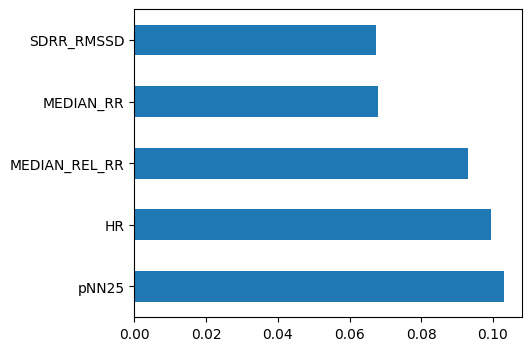

In [17]:
#imbalanced data
# plot the 5 most important features 
plt.figure(figsize=(5,4))
feat_importances = pd.Series(model_RFR.feature_importances_, index = X_train.columns)
feat_importances.nlargest(5).plot(kind='barh');

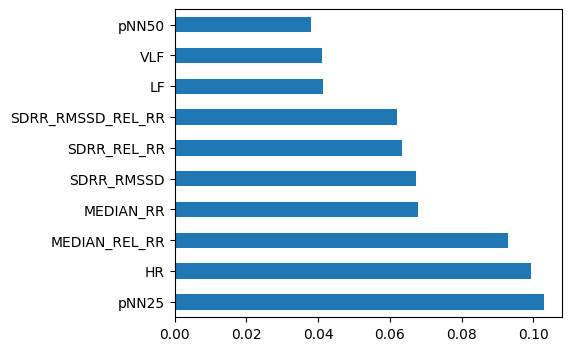

In [18]:
#imbalanced data
# plot the 10 most important features 
plt.figure(figsize=(5,4))
feat_importances = pd.Series(model_RFR.feature_importances_, index = X_train.columns)
feat_importances.nlargest(10).plot(kind='barh');

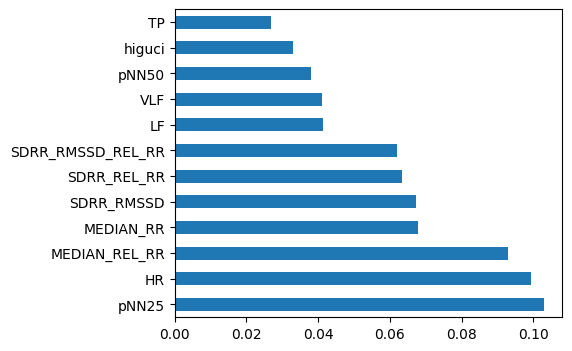

In [19]:
#imbalanced data
# plot the 12 most important features 
plt.figure(figsize=(5,4))
feat_importances = pd.Series(model_RFR.feature_importances_, index = X_train.columns)
feat_importances.nlargest(12).plot(kind='barh');

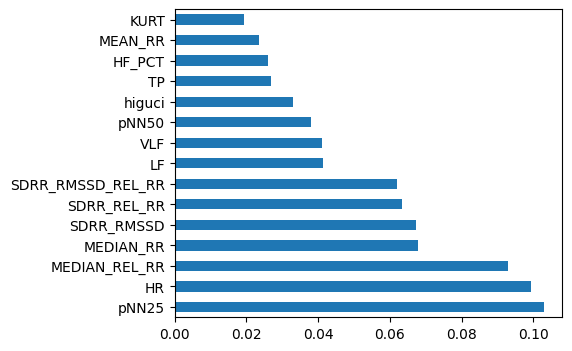

In [20]:
#imbalanced data
# plot the 15 most important features 
plt.figure(figsize=(5,4))
feat_importances = pd.Series(model_RFR.feature_importances_, index = X_train.columns)
feat_importances.nlargest(15).plot(kind='barh');

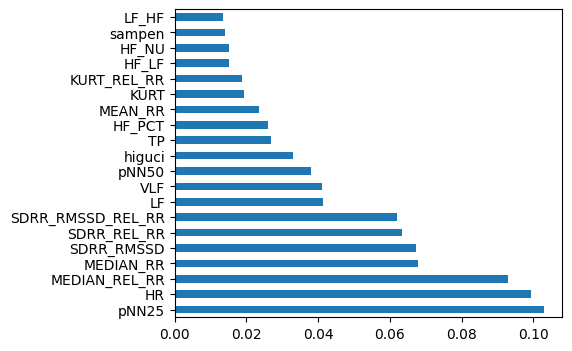

In [21]:
#imbalanced data
# plot the 20 most important features 
plt.figure(figsize=(5,4))
feat_importances = pd.Series(model_RFR.feature_importances_, index = X_train.columns)
feat_importances.nlargest(20).plot(kind='barh');

In [14]:
#imbalanced data
swell_data.describe().T

,count,mean,std,min,25%,50%,75%,max
MEAN_RR,410322.0,846.670724,124.585711,547.483802,760.243974,8.229160e+02,924.220881,1322.016957
MEDIAN_RR,410322.0,841.980595,132.286414,517.293295,755.749505,8.196700e+02,917.009455,1653.122250
SDRR,410322.0,109.302941,77.065738,27.233947,64.196632,8.262429e+01,118.193410,563.486949
RMSSD,410322.0,14.978707,4.122602,5.529742,11.831264,1.441720e+01,17.931444,26.629477
SDSD,410322.0,14.977976,4.122605,5.529630,11.831056,1.441662e+01,17.929922,26.629392
SDRR_RMSSD,410322.0,7.393869,5.144097,2.660381,4.539551,5.950217e+00,7.918086,54.523950
HR,410322.0,73.937573,10.335769,48.736986,66.707281,7.421782e+01,80.330105,113.754253
pNN25,410322.0,9.845863,8.202293,0.000000,3.666667,7.600000e+00,13.333333,39.400000
pNN50,410322.0,0.865656,0.989847,0.000000,0.000000,4.666667e-01,1.400000,5.466667
SD1,410322.0,10.594563,2.916095,3.911344,8.368612,1.019749e+01,12.682600,18.836107


In [15]:
np.sum(y==0)

0

<AxesSubplot:xlabel='condition', ylabel='count'>

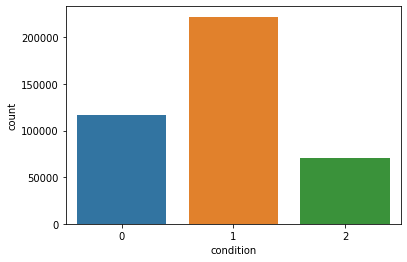

In [15]:
#imbalanced data
import seaborn as sns

#Data Visualization pf imbalanced dataset
sns.countplot(x = 'condition', data = swell_data)

array([[<AxesSubplot:title={'center':'MEAN_RR'}>,
        <AxesSubplot:title={'center':'MEDIAN_RR'}>,
        <AxesSubplot:title={'center':'SDRR'}>,
        <AxesSubplot:title={'center':'RMSSD'}>,
        <AxesSubplot:title={'center':'SDSD'}>,
        <AxesSubplot:title={'center':'SDRR_RMSSD'}>],
       [<AxesSubplot:title={'center':'HR'}>,
        <AxesSubplot:title={'center':'pNN25'}>,
        <AxesSubplot:title={'center':'pNN50'}>,
        <AxesSubplot:title={'center':'SD1'}>,
        <AxesSubplot:title={'center':'SD2'}>,
        <AxesSubplot:title={'center':'KURT'}>],
       [<AxesSubplot:title={'center':'SKEW'}>,
        <AxesSubplot:title={'center':'MEAN_REL_RR'}>,
        <AxesSubplot:title={'center':'MEDIAN_REL_RR'}>,
        <AxesSubplot:title={'center':'SDRR_REL_RR'}>,
        <AxesSubplot:title={'center':'RMSSD_REL_RR'}>,
        <AxesSubplot:title={'center':'SDSD_REL_RR'}>],
       [<AxesSubplot:title={'center':'SDRR_RMSSD_REL_RR'}>,
        <AxesSubplot:title={'center':'KU

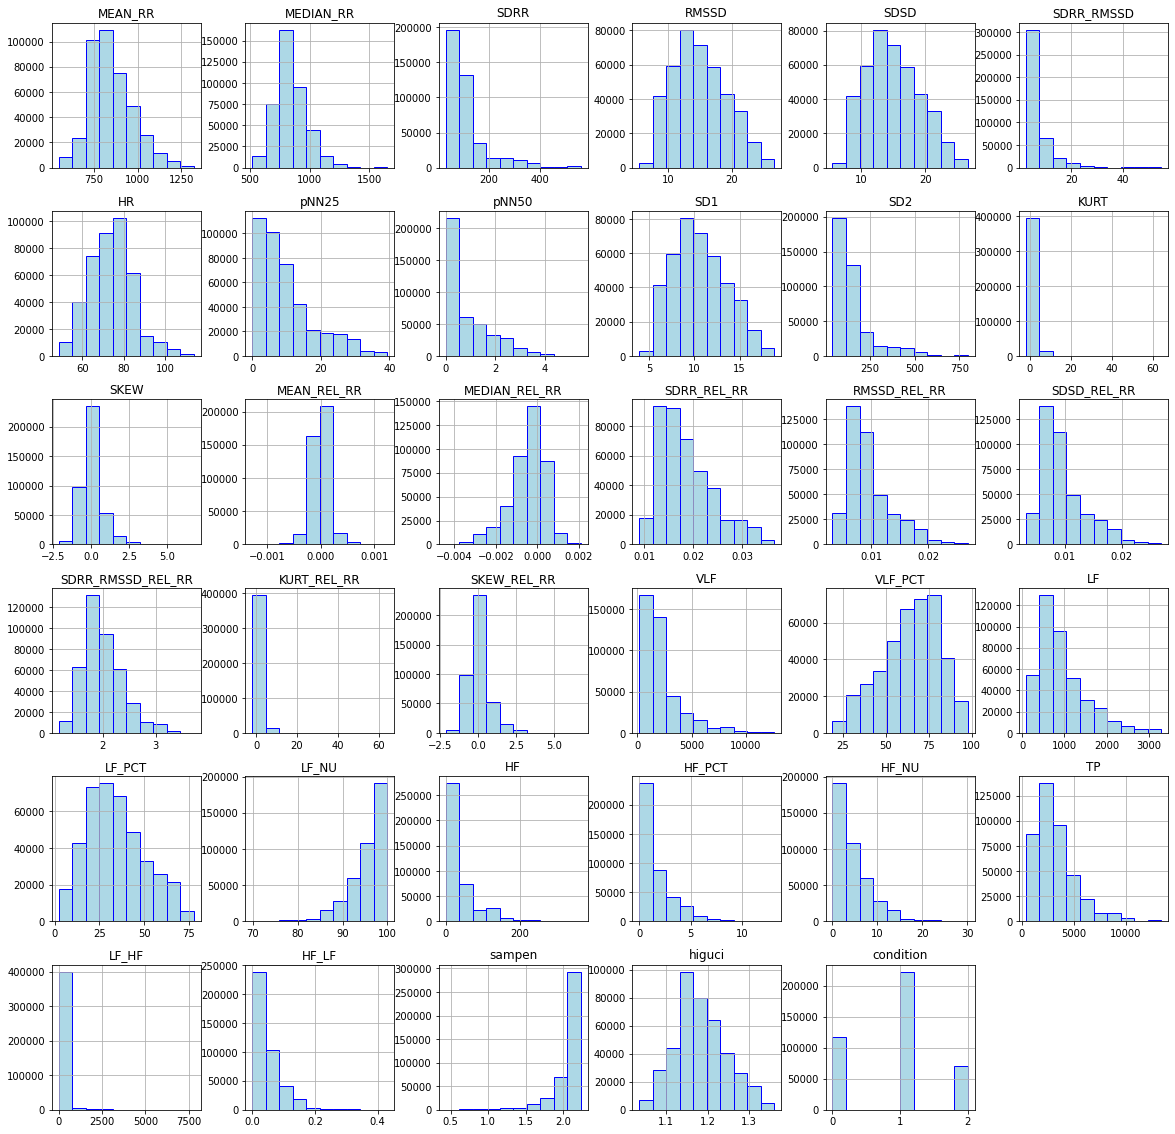

In [16]:
fig = plt.figure(figsize=(20,20))
ax = fig.gca()

swell_data.hist(ax=ax, color = "lightblue", ec = "blue")

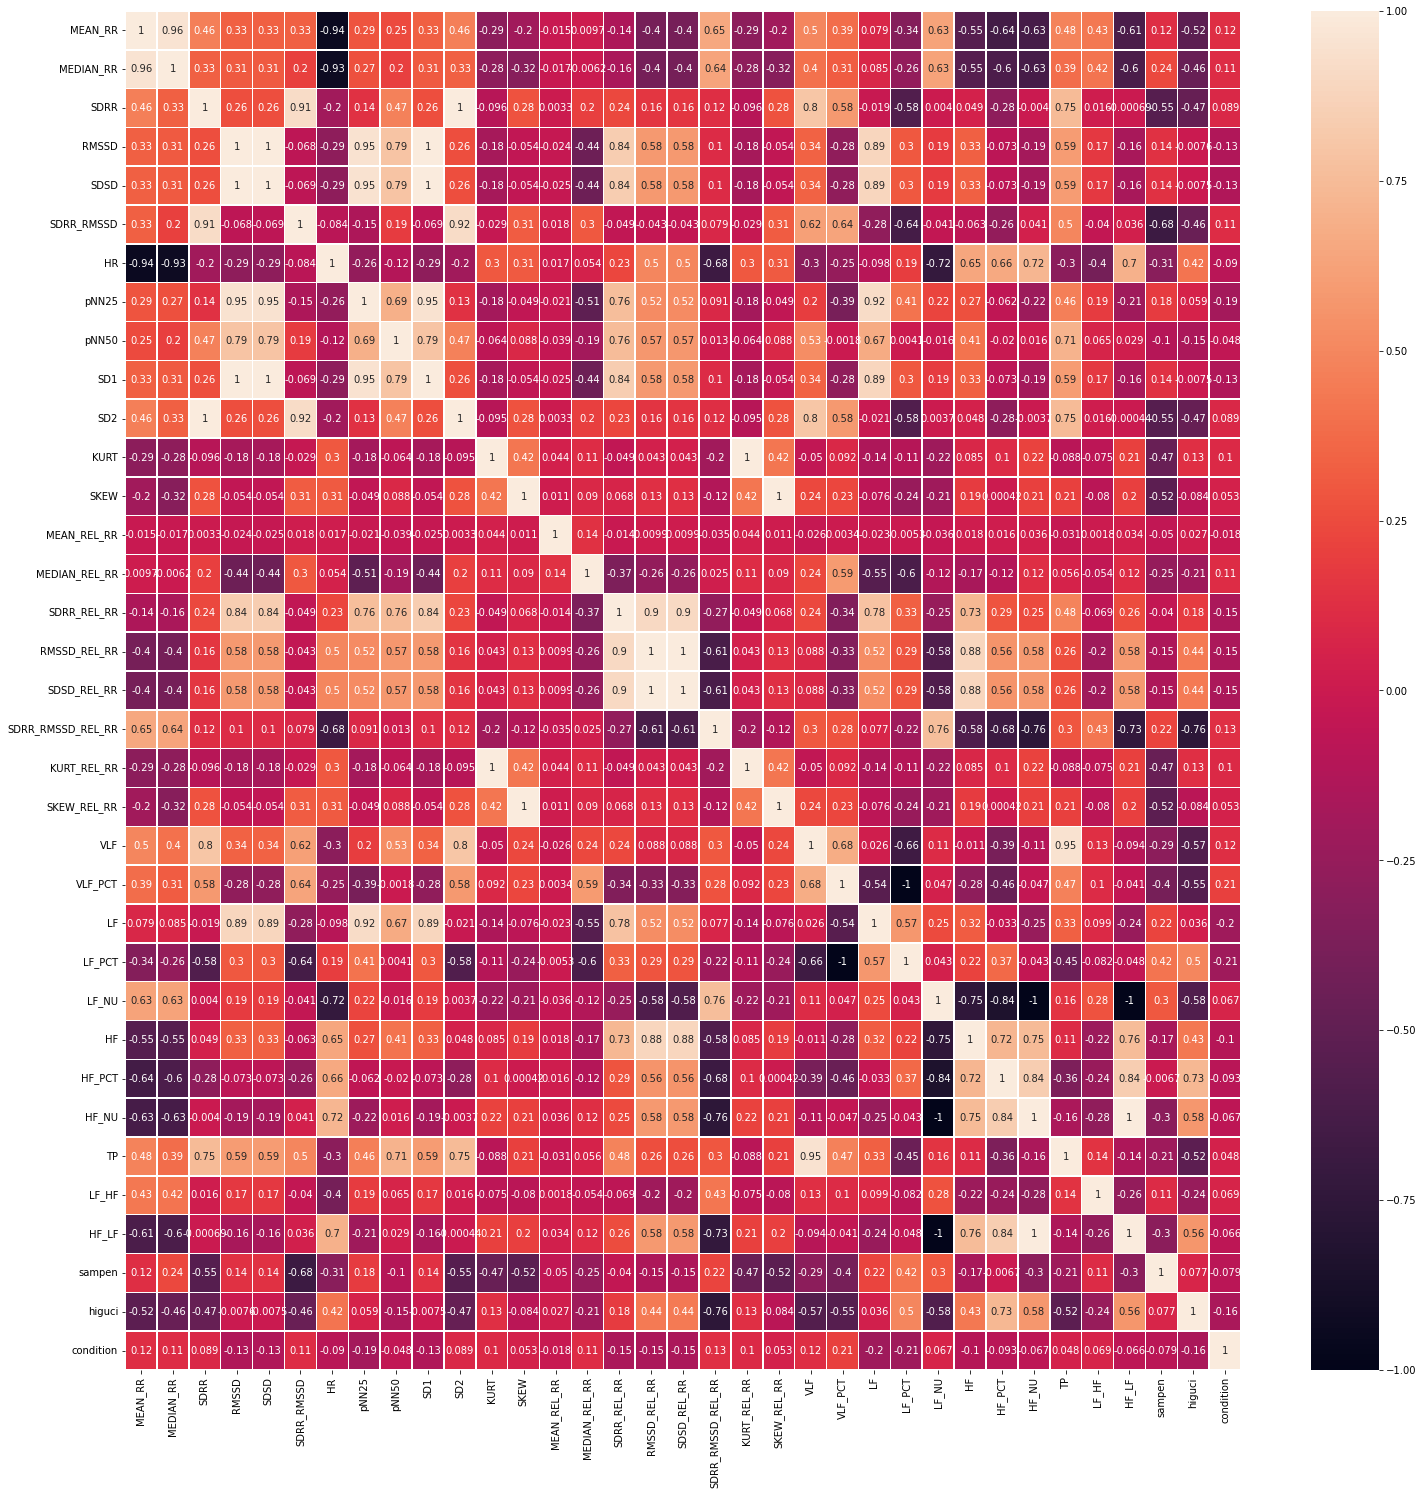

In [23]:
import seaborn as sns
 
# checking correlation using heatmap

fig = plt.figure(figsize=(25,25))

#plotting the heatmap for correlation
ax = sns.heatmap(swell_data.corr(), annot=True, linewidths=0.5)

In [28]:
# Get correlation matrix 
corr = swell_data.corr()

# Create a mask for values above 90% 
# But also below 100% since it variables correlated with the same one
mask = (swell_data.corr() > 0.8) & (swell_data.corr() < 1.0)
high_corr = corr[mask]

# Create a new column mask using any() and ~
col_to_filter_out = ~high_corr[mask].any()

col_to_filter_out

MEAN_RR              False
MEDIAN_RR            False
SDRR                 False
RMSSD                False
SDSD                 False
SDRR_RMSSD           False
HR                    True
pNN25                False
pNN50                 True
SD1                  False
SD2                  False
KURT                  True
SKEW                  True
MEAN_REL_RR           True
MEDIAN_REL_RR         True
SDRR_REL_RR          False
RMSSD_REL_RR         False
SDSD_REL_RR          False
SDRR_RMSSD_REL_RR     True
KURT_REL_RR           True
SKEW_REL_RR           True
VLF                  False
VLF_PCT               True
LF                   False
LF_PCT                True
LF_NU                 True
HF                   False
HF_PCT               False
HF_NU                False
TP                   False
LF_HF                 True
HF_LF                False
sampen                True
higuci                True
condition             True
dtype: bool

In [15]:
#SMOTE
import pandas as pd

#SMOTE (Synthetic Minority Over-sampling Technique): Generate synthetic samples for the minority class.
from imblearn.over_sampling import SMOTE

# Define SMOTE strategy
smote = SMOTE(random_state=42)

# Fit and apply the transform
X_resampled_s, y_resampled_s = smote.fit_resample(X, y)
X_resampled_s.shape, y_resampled_s.shape

((666720, 34), (666720,))

In [16]:
#SMOTE
X_train_s, X_test_s, Y_train_s, Y_test_s = train_test_split(X_resampled_s, y_resampled_s, test_size=0.2, stratify=y_resampled_s, random_state=42, shuffle=True)

In [17]:
#ADASYN (Adaptive Synthetic Sampling): Generates more synthetic samples for the minority class in regions of the feature space where the class is underrepresented.
from imblearn.over_sampling import ADASYN

# Define ADASYN strategy
adasyn = ADASYN()

# Fit and apply the transform
X_resampled_a, y_resampled_a = adasyn.fit_resample(X, y)
X_resampled_a.shape, y_resampled_a.shape

((666861, 34), (666861,))

In [18]:
#ADASYN
X_train_a, X_test_a, Y_train_a, Y_test_a = train_test_split(X_resampled_a, y_resampled_a, test_size=0.2, stratify=y_resampled_a, random_state=42, shuffle=True)

LR: 0.629732 (0.003595)
LDA: 0.638046 (0.001516)
KNN: 0.992411 (0.000333)
CART: 0.999202 (0.000083)
NB: 0.520967 (0.001166)
RF: 1.000000 (0.000000)
ETC: 1.000000 (0.000000)
ETC: 0.999878 (0.000054)
AdaBoost: 0.694218 (0.013266)
GradBoost: 0.914518 (0.001891)


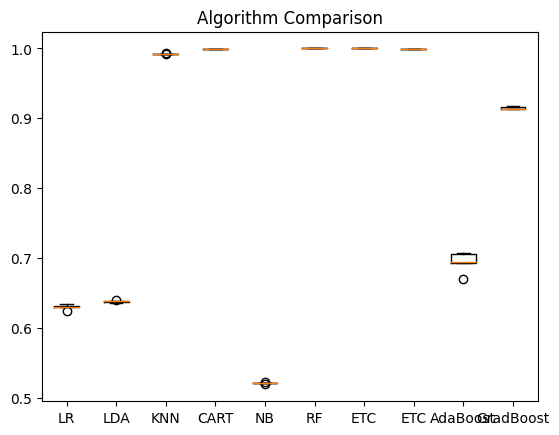

In [37]:
#imbalanced data
from sklearn.ensemble import RandomForestClassifier

num_trees = 100

# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('RF', RandomForestClassifier()))
#models.append(('ETC', ExtraTreesClassifier()))
models.append(('Bagg', BaggingClassifier(base_estimator=DecisionTreeClassifier())))
#models.append(('AdaBoost', AdaBoostClassifier(n_estimators=num_trees)))
models.append(('GradBoost', GradientBoostingClassifier(n_estimators=num_trees)))

#models.append(('NN', MLPRegressor(hidden_layer_sizes=(100 ), activation='relu', solver='adam', random_state=42)))
#models.append(('SVM', SVC(gamma='auto')))

# evaluate each model in turn
results = []
names = []
for name, model in models:
 kfold = StratifiedKFold(n_splits=5, random_state=1, shuffle=True)
 cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
 results.append(cv_results)
 names.append(name)
 print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

# Compare Algorithms
pyplot.boxplot(results, labels=names)
pyplot.title('Algorithm Comparison')
pyplot.show()

LR: 0.629230 (0.001636)
LDA: 0.638046 (0.001516)
KNN: 1.000000 (0.000000)
CART: 0.999208 (0.000100)
NB: 0.508272 (0.001290)
RF: 1.000000 (0.000000)
ETC: 1.000000 (0.000000)
Bagg: 0.999887 (0.000016)
AdaBoost: 0.692832 (0.009718)
GradBoost: 0.913970 (0.002408)


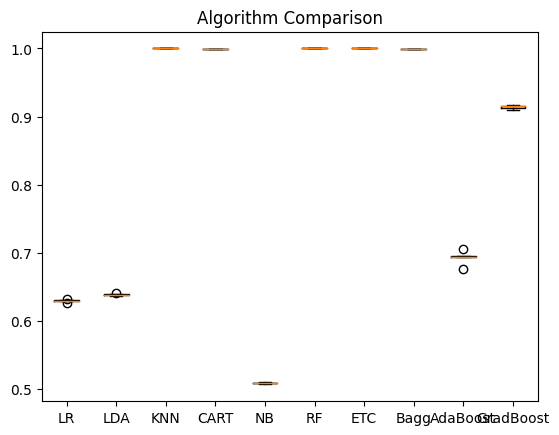

In [24]:
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier

data_scaler = preprocessing.MinMaxScaler(feature_range=(0,1))
X = data_scaler.fit_transform(X)

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42, shuffle=True)

num_trees = 100

# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('RF', RandomForestClassifier()))
#models.append(('ETC', ExtraTreesClassifier()))
models.append(('Bagg', BaggingClassifier(base_estimator=DecisionTreeClassifier())))
#models.append(('AdaBoost', AdaBoostClassifier(n_estimators=num_trees)))
models.append(('GradBoost', GradientBoostingClassifier(n_estimators=num_trees)))

#models.append(('NN', MLPRegressor(hidden_layer_sizes=(100 ), activation='relu', solver='adam', random_state=42)))
#models.append(('SVM', SVC(gamma='auto')))

# evaluate each model in turn
results = []
names = []
for name, model in models:
 kfold = StratifiedKFold(n_splits=5, random_state=1, shuffle=True)
 cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
 results.append(cv_results)
 names.append(name)
 print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

# Compare Algorithms
pyplot.boxplot(results, labels=names)
pyplot.title('Algorithm Comparison')
pyplot.show()

LR: 0.629230 (0.001636)
LDA: 0.638046 (0.001516)
KNN: 1.000000 (0.000000)
CART: 0.999208 (0.000100)
NB: 0.508272 (0.001290)
RF: 1.000000 (0.000000)
ETC: 1.000000 (0.000000)
Bagg: 0.999811 (0.000104)
AdaBoost: 0.692832 (0.009718)
GradBoost: 0.913970 (0.002408)


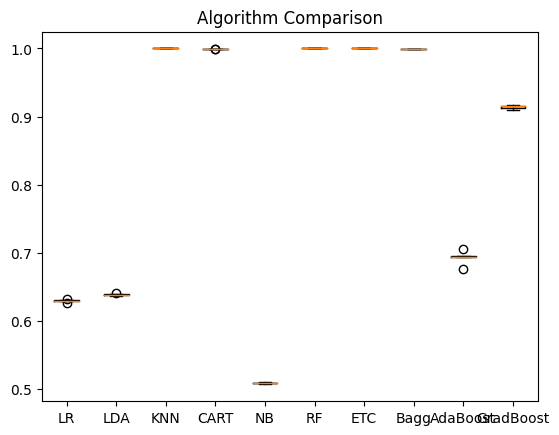

In [25]:
#imbalanced data
from sklearn.preprocessing import Normalizer

Data_normalizer = Normalizer(norm='l1').fit(X)
Data_normalized = Data_normalizer.transform(X)

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42, shuffle=True)

num_trees = 100

# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('RF', RandomForestClassifier()))
#models.append(('ETC', ExtraTreesClassifier()))
models.append(('Bagg', BaggingClassifier(base_estimator=DecisionTreeClassifier())))
#models.append(('AdaBoost', AdaBoostClassifier(n_estimators=num_trees)))
models.append(('GradBoost', GradientBoostingClassifier(n_estimators=num_trees)))

#models.append(('NN', MLPRegressor(hidden_layer_sizes=(100 ), activation='relu', solver='adam', random_state=42)))
#models.append(('SVM', SVC(gamma='auto')))

# evaluate each model in turn
results = []
names = []
for name, model in models:
 kfold = StratifiedKFold(n_splits=5, random_state=1, shuffle=True)
 cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
 results.append(cv_results)
 names.append(name)
 print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

# Compare Algorithms
pyplot.boxplot(results, labels=names)
pyplot.title('Algorithm Comparison')
pyplot.show()

LR: 0.629230 (0.001636)
LDA: 0.638046 (0.001516)
KNN: 1.000000 (0.000000)
CART: 0.999205 (0.000057)
NB: 0.508272 (0.001290)
RF: 1.000000 (0.000000)
ETC: 1.000000 (0.000000)
Bagg: 0.999884 (0.000076)
AdaBoost: 0.692832 (0.009718)
GradBoost: 0.913970 (0.002408)


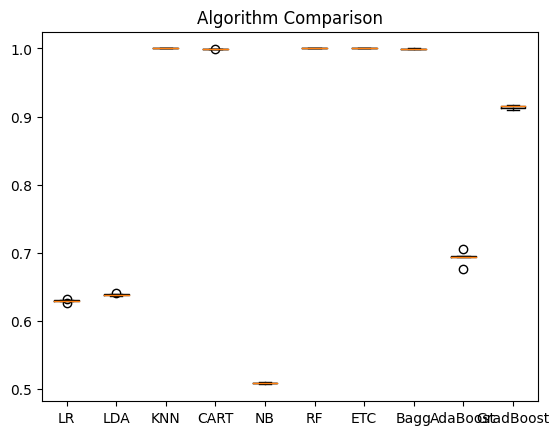

In [26]:
#imbalanced data
from sklearn.preprocessing import Normalizer

Data_normalizer = Normalizer(norm='l2').fit(X)
Data_normalized = Data_normalizer.transform(X)

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42, shuffle=True)

num_trees = 100

# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('RF', RandomForestClassifier()))
#models.append(('ETC', ExtraTreesClassifier()))
models.append(('Bagg', BaggingClassifier(base_estimator=DecisionTreeClassifier())))
#models.append(('AdaBoost', AdaBoostClassifier(n_estimators=num_trees)))
models.append(('GradBoost', GradientBoostingClassifier(n_estimators=num_trees)))

#models.append(('NN', MLPRegressor(hidden_layer_sizes=(100 ), activation='relu', solver='adam', random_state=42)))
#models.append(('SVM', SVC(gamma='auto')))

# evaluate each model in turn
results = []
names = []
for name, model in models:
 kfold = StratifiedKFold(n_splits=5, random_state=1, shuffle=True)
 cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
 results.append(cv_results)
 names.append(name)
 print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

# Compare Algorithms
pyplot.boxplot(results, labels=names)
pyplot.title('Algorithm Comparison')
pyplot.show()

LR: 0.630381 (0.001783)
LDA: 0.638046 (0.001516)
KNN: 0.999985 (0.000017)
CART: 0.999199 (0.000117)
NB: 0.508272 (0.001290)
RF: 1.000000 (0.000000)
ETC: 1.000000 (0.000000)
Bagg: 0.999790 (0.000146)
AdaBoost: 0.694026 (0.013681)
GradBoost: 0.913705 (0.001709)


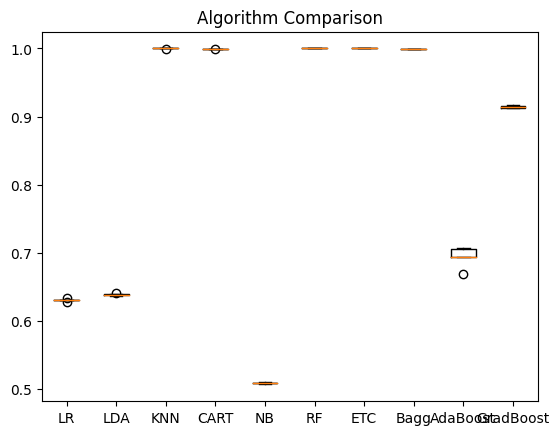

In [27]:
#imbalanced data
from sklearn.preprocessing import StandardScaler

Data_normalizer = StandardScaler().fit(X)
X = Data_normalizer.transform(X)

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42, shuffle=True)

num_trees = 100

# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('RF', RandomForestClassifier()))
#models.append(('ETC', ExtraTreesClassifier()))
models.append(('Bagg', BaggingClassifier(base_estimator=DecisionTreeClassifier())))
#models.append(('AdaBoost', AdaBoostClassifier(n_estimators=num_trees)))
models.append(('GradBoost', GradientBoostingClassifier(n_estimators=num_trees)))

#models.append(('NN', MLPRegressor(hidden_layer_sizes=(100 ), activation='relu', solver='adam', random_state=42)))
#models.append(('SVM', SVC(gamma='auto')))

# evaluate each model in turn
results = []
names = []
for name, model in models:
 kfold = StratifiedKFold(n_splits=5, random_state=1, shuffle=True)
 cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
 results.append(cv_results)
 names.append(name)
 print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

# Compare Algorithms
pyplot.boxplot(results, labels=names)
pyplot.title('Algorithm Comparison')
pyplot.show()

In [34]:
#imbalanced data
# Train a random forest classifier
clf = RandomForestClassifier()
clf.fit(X_train, Y_train)

# Use calibrated classification to address bias
calibrated_clf = CalibratedClassifierCV(clf, cv=5, method='sigmoid')
calibrated_clf.fit(X_train, Y_train)

# Make predictions and evaluate performance
y_pred = calibrated_clf.predict(X_test)
accuracy = accuracy_score(Y_test, y_pred)
confusion_mat = confusion_matrix(Y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion matrix:", confusion_mat)

Accuracy: 1.0
Confusion matrix: [[23387     0     0]
 [    0 44448     0]
 [    0     0 14230]]


In [18]:
#imbalanced data
from sklearn.model_selection import GridSearchCV

model = RandomForestClassifier(random_state=42)

param_grid = { 
    'n_estimators': [100, 200, 300],
    #'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [2,4,6],
    'criterion' :['gini', 'entropy']
    #'min_samples_split': [2, 5, 10],
    #'min_samples_leaf': [1, 2, 4],
    #'bootstrap': [True, False]
}

CV_rfc = GridSearchCV(estimator=model, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train, Y_train)

CV_rfc.best_params_

KeyboardInterrupt: 

In [33]:
#imbalanced data
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

# Make predictions on validation dataset
model = RandomForestClassifier(random_state=42, n_estimators= 200, max_depth=6, criterion='entropy')
model.fit(X_train, Y_train)
predictions = model.predict(X_test)

# Evaluate predictions
print(accuracy_score(Y_test, predictions))
print(confusion_matrix(Y_test, predictions))
print(classification_report(Y_test, predictions))

0.8261743739718516
[[15571  7144   672]
 [  137 44069   242]
 [  368  5702  8160]]
              precision    recall  f1-score   support

           0       0.97      0.67      0.79     23387
           1       0.77      0.99      0.87     44448
           2       0.90      0.57      0.70     14230

    accuracy                           0.83     82065
   macro avg       0.88      0.74      0.79     82065
weighted avg       0.85      0.83      0.82     82065



In [37]:
#imbalanced data
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

# Make predictions on validation dataset
model = RandomForestClassifier(random_state=42, max_features='auto', n_estimators= 100, max_depth=8, criterion='gini')
model.fit(X_train, Y_train)
predictions = model.predict(X_test)

# Evaluate predictions
print(accuracy_score(Y_test, predictions))
print(confusion_matrix(Y_test, predictions))
print(classification_report(Y_test, predictions))

0.9081703527691464
[[19706  3474   207]
 [   76 44223   149]
 [  256  3374 10600]]
              precision    recall  f1-score   support

           0       0.98      0.84      0.91     23387
           1       0.87      0.99      0.93     44448
           2       0.97      0.74      0.84     14230

    accuracy                           0.91     82065
   macro avg       0.94      0.86      0.89     82065
weighted avg       0.92      0.91      0.91     82065



In [38]:
#imbalanced data
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

# Make predictions on validation dataset
model = RandomForestClassifier(random_state=42, max_features='sqrt', n_estimators= 100, max_depth=8, criterion='gini')
model.fit(X_train, Y_train)
predictions = model.predict(X_test)

# Evaluate predictions
print(accuracy_score(Y_test, predictions))
print(confusion_matrix(Y_test, predictions))
print(classification_report(Y_test, predictions))

0.9081703527691464
[[19706  3474   207]
 [   76 44223   149]
 [  256  3374 10600]]
              precision    recall  f1-score   support

           0       0.98      0.84      0.91     23387
           1       0.87      0.99      0.93     44448
           2       0.97      0.74      0.84     14230

    accuracy                           0.91     82065
   macro avg       0.94      0.86      0.89     82065
weighted avg       0.92      0.91      0.91     82065



In [39]:
#imbalanced data
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

# Make predictions on validation dataset
model = RandomForestClassifier(random_state=42, max_features='log2', n_estimators= 100, max_depth=8, criterion='gini')
model.fit(X_train, Y_train)
predictions = model.predict(X_test)

# Evaluate predictions
print(accuracy_score(Y_test, predictions))
print(confusion_matrix(Y_test, predictions))
print(classification_report(Y_test, predictions))

0.9081703527691464
[[19706  3474   207]
 [   76 44223   149]
 [  256  3374 10600]]
              precision    recall  f1-score   support

           0       0.98      0.84      0.91     23387
           1       0.87      0.99      0.93     44448
           2       0.97      0.74      0.84     14230

    accuracy                           0.91     82065
   macro avg       0.94      0.86      0.89     82065
weighted avg       0.92      0.91      0.91     82065



In [40]:
#imbalanced data
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

# Make predictions on validation dataset
model = RandomForestClassifier(random_state=42, n_estimators= 200, max_depth=8, criterion='gini')
model.fit(X_train, Y_train)
predictions = model.predict(X_test)

# Evaluate predictions
print(accuracy_score(Y_test, predictions))
print(confusion_matrix(Y_test, predictions))
print(classification_report(Y_test, predictions))

0.9051118016206665
[[19490  3717   180]
 [   69 44284    95]
 [  237  3489 10504]]
              precision    recall  f1-score   support

           0       0.98      0.83      0.90     23387
           1       0.86      1.00      0.92     44448
           2       0.97      0.74      0.84     14230

    accuracy                           0.91     82065
   macro avg       0.94      0.86      0.89     82065
weighted avg       0.92      0.91      0.90     82065



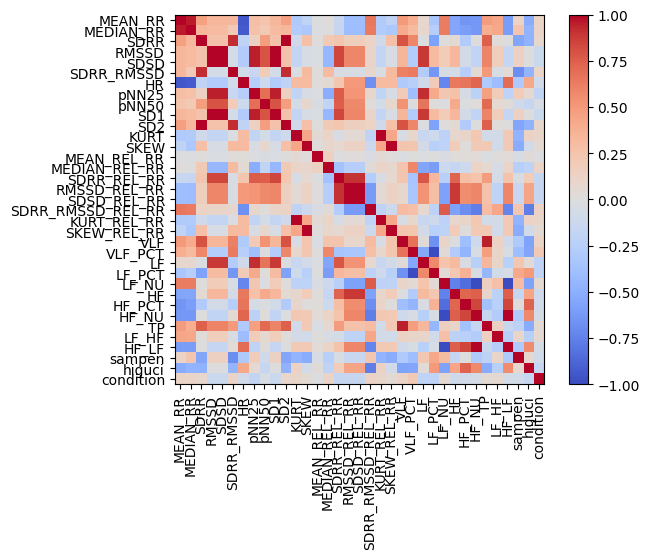

In [12]:
# Select the relevant columns for analysis
columns = ['MEAN_RR', 'MEDIAN_RR', 'SDRR', 'RMSSD', 'SDSD', 'SDRR_RMSSD', 'HR',
           'pNN25', 'pNN50', 'SD1', 'SD2', 'KURT', 'SKEW', 'MEAN_REL_RR',
           'MEDIAN_REL_RR', 'SDRR_REL_RR', 'RMSSD_REL_RR', 'SDSD_REL_RR',
           'SDRR_RMSSD_REL_RR', 'KURT_REL_RR', 'SKEW_REL_RR', 'VLF', 'VLF_PCT',
           'LF', 'LF_PCT', 'LF_NU', 'HF', 'HF_PCT', 'HF_NU', 'TP', 'LF_HF',
           'HF_LF', 'sampen', 'higuci', 'condition']

swell_data = swell_data[columns]

# Calculate the Pearson correlation coefficient matrix
corr_matrix = swell_data.corr()

# Plot the correlation matrix as a heatmap
plt.imshow(corr_matrix, cmap='coolwarm', interpolation='nearest')
plt.xticks(np.arange(len(columns)), columns, rotation=90)
plt.yticks(np.arange(len(columns)), columns)
plt.colorbar()
plt.show()

In [13]:
'''
# Check the linearity of the dataset based on the correlation matrix
linear_dependent = False
count = 0

for i in range(len(columns)):
    for j in range(i+1, len(columns)):
        if abs(corr_matrix.iloc[i,j]) < 0.8:
            linear_dependent = True
            count = count + 1

count
'''

'\n# Check the linearity of the dataset based on the correlation matrix\nlinear_dependent = False\ncount = 0\n\nfor i in range(len(columns)):\n    for j in range(i+1, len(columns)):\n        if abs(corr_matrix.iloc[i,j]) < 0.8:\n            linear_dependent = True\n            count = count + 1\n\ncount\n'

In [14]:
#linear regression
from sklearn.metrics import r2_score

# Split the dataset into training and testing sets
X_train = swell_data.iloc[:-50, :-1].values
y_train = swell_data.iloc[:-50, -1].values
X_test = swell_data.iloc[-50:, :-1].values 
y_test = swell_data.iloc[-50:, -1].values 

# Train a linear regression model on the training set
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = lr_model.predict(X_test)

# Calculate the R-squared value of the linear regression model
r2 = r2_score(y_test, y_pred)

if r2 > 0.8:
    print('The dataset is linearly dependent')
else:
    print('The dataset is non-linearly dependent') 

The dataset is non-linearly dependent


In [15]:
#Polynomial Regression:
# Import necessary libraries
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Create some sample data
X = swell_data.drop('condition', axis=1)
y = swell_data['condition']

# Transform data for polynomial regression
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

# Fit the polynomial regression model
poly_model = LinearRegression().fit(X_poly, y)

# Predict y values using the polynomial regression model
y_pred = poly_model.predict(X_poly)

# Evaluate model performance using R-squared
from sklearn.metrics import r2_score
r2 = r2_score(y, y_pred) 

if r2 > 0.8:
    print('The dataset is linearly dependent')
else:
    print('The dataset is non-linearly dependent') 

The dataset is non-linearly dependent


In [16]:
'''
#LogisticRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np

# create some sample data
X = swell_data.drop('condition', axis=1)
y = swell_data['condition']

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# create a logistic regression model and fit it to the training data
model = LogisticRegression()
model.fit(X_train, y_train)

# make predictions on the test data
y_pred = model.predict(X_test)

# evaluate the model's performance using various metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average=None)
recall = recall_score(y_test, y_pred, average=None)
f1 = f1_score(y_test, y_pred,average=None)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1)
'''

'\n#LogisticRegression\nfrom sklearn.linear_model import LogisticRegression\nfrom sklearn.model_selection import train_test_split\nfrom sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score\nimport numpy as np\n\n# create some sample data\nX = swell_data.drop(\'condition\', axis=1)\ny = swell_data[\'condition\']\n\n# split the data into training and testing sets\nX_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)\n\n# create a logistic regression model and fit it to the training data\nmodel = LogisticRegression()\nmodel.fit(X_train, y_train)\n\n# make predictions on the test data\ny_pred = model.predict(X_test)\n\n# evaluate the model\'s performance using various metrics\naccuracy = accuracy_score(y_test, y_pred)\nprecision = precision_score(y_test, y_pred, average=None)\nrecall = recall_score(y_test, y_pred, average=None)\nf1 = f1_score(y_test, y_pred,average=None)\n\nprint("Accuracy:", accuracy)\nprint("Precision:", prec

In [17]:
'''
#DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
import numpy as np

# create some sample data
X = swell_data.drop('condition', axis=1)
y = swell_data['condition']

# create a Decision Tree Regression model and fit it to the data
model = DecisionTreeRegressor()
model.fit(X, y)

# make predictions
y_pred = model.predict(X)

# evaluate the model's performance using R-squared
r2 = r2_score(y, y_pred)

print("R-squared score:", r2)
'''

'\n#DecisionTreeRegressor\nfrom sklearn.tree import DecisionTreeRegressor\nfrom sklearn.metrics import r2_score\nimport numpy as np\n\n# create some sample data\nX = swell_data.drop(\'condition\', axis=1)\ny = swell_data[\'condition\']\n\n# create a Decision Tree Regression model and fit it to the data\nmodel = DecisionTreeRegressor()\nmodel.fit(X, y)\n\n# make predictions\ny_pred = model.predict(X)\n\n# evaluate the model\'s performance using R-squared\nr2 = r2_score(y, y_pred)\n\nprint("R-squared score:", r2)\n'

In [18]:
'''
#Random Forest Regression:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
import numpy as np

# create some sample data
X = swell_data.drop('condition', axis=1)
y = swell_data['condition']

# create a Random Forest Regression model and fit it to the data
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X, y)

# make predictions
y_pred = model.predict(X)

# evaluate the model's performance using R-squared
r2 = r2_score(y, y_pred)

print("R-squared score:", r2)
'''

'\n#Random Forest Regression:\nfrom sklearn.ensemble import RandomForestRegressor\nfrom sklearn.metrics import r2_score\nimport numpy as np\n\n# create some sample data\nX = swell_data.drop(\'condition\', axis=1)\ny = swell_data[\'condition\']\n\n# create a Random Forest Regression model and fit it to the data\nmodel = RandomForestRegressor(n_estimators=100, random_state=42)\nmodel.fit(X, y)\n\n# make predictions\ny_pred = model.predict(X)\n\n# evaluate the model\'s performance using R-squared\nr2 = r2_score(y, y_pred)\n\nprint("R-squared score:", r2)\n'

In [19]:
'''
#Neural Network Regression:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score
import numpy as np

# create some sample data
X = swell_data.drop('condition', axis=1)
y = swell_data['condition']

# create a Neural Network Regression model and fit it to the data
model = MLPRegressor(hidden_layer_sizes=(100 ), activation='relu', solver='adam', random_state=42)
model.fit(X, y)

# make predictions
y_pred = model.predict(X)

# evaluate the model's performance using R-squared
r2 = r2_score(y, y_pred)

print("R-squared score:", r2)  
'''

'\n#Neural Network Regression:\nfrom sklearn.neural_network import MLPRegressor\nfrom sklearn.metrics import r2_score\nimport numpy as np\n\n# create some sample data\nX = swell_data.drop(\'condition\', axis=1)\ny = swell_data[\'condition\']\n\n# create a Neural Network Regression model and fit it to the data\nmodel = MLPRegressor(hidden_layer_sizes=(100 ), activation=\'relu\', solver=\'adam\', random_state=42)\nmodel.fit(X, y)\n\n# make predictions\ny_pred = model.predict(X)\n\n# evaluate the model\'s performance using R-squared\nr2 = r2_score(y, y_pred)\n\nprint("R-squared score:", r2)  \n'

In [24]:
#L-1
from sklearn.linear_model import Lasso

# Fit Lasso regression model
lasso = Lasso(alpha=0.1)
lasso.fit(X, y)

# Get selected features and their ranking
selected_features = [i for i in range(len(lasso.coef_)) if lasso.coef_[i] != 0]
feature_ranking = sorted([(i, abs(lasso.coef_[i])) for i in range(len(lasso.coef_))], key=lambda x: x[1], reverse=True)

# Print selected features and their ranking
print("Selected features:", selected_features)
print("Feature ranking:", feature_ranking)

#predictions = lasso.predict(X_test)

# Evaluate predictions
#print(accuracy_score(Y_test, predictions))
#print(confusion_matrix(Y_test, predictions))
#print(classification_report(Y_test, predictions))

Selected features: [0, 1, 7, 10, 11, 19, 21, 23, 25, 26, 28, 30]
Feature ranking: [(28, 0.016419199984552664), (7, 0.009327607325351806), (11, 0.008668969035279325), (25, 0.005509510228703899), (26, 0.0025603390829936974), (1, 0.0005178433403139831), (23, 0.00023596285943925413), (10, 0.00020942983434934077), (0, 0.00016616692469202112), (30, 7.97350453821006e-05), (21, 3.689891983835615e-05), (19, 1.133888783491845e-15), (2, 0.0), (3, 0.0), (4, 0.0), (5, 0.0), (6, 0.0), (8, 0.0), (9, 0.0), (12, 0.0), (13, 0.0), (14, 0.0), (15, 0.0), (16, 0.0), (17, 0.0), (18, 0.0), (20, 0.0), (22, 0.0), (24, 0.0), (27, 0.0), (29, 0.0), (31, 0.0), (32, 0.0), (33, 0.0)]


In [21]:
#L-2
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge

# Fit Ridge regression model
ridge = Ridge(alpha=0.1)
ridge.fit(X, y)

# Get selected features and their ranking
feature_ranking = sorted([(i, abs(ridge.coef_[i])) for i in range(len(ridge.coef_))], key=lambda x: x[1], reverse=True)

# Print selected features and their ranking
print("Selected features:", [x[0] for x in feature_ranking])
print("Feature ranking:", feature_ranking)

Selected features: [14, 15, 31, 3, 4, 16, 17, 9, 33, 2, 10, 13, 32, 18, 27, 8, 22, 24, 5, 20, 12, 25, 28, 6, 7, 19, 11, 26, 0, 23, 21, 29, 1, 30]
Feature ranking: [(14, 47.20091368947125), (15, 18.206602276704324), (31, 12.725054664616495), (3, 5.310260857770496), (4, 3.6224940251550617), (16, 2.967041536786986), (17, 2.9662216558611108), (9, 2.562344599574451), (33, 1.3162015391607687), (2, 1.1638935891944573), (10, 0.8187129638749895), (13, 0.49881738831939026), (32, 0.1339950095388945), (18, 0.1117813960267294), (27, 0.08275499244014455), (8, 0.06747418471852197), (22, 0.04162350883086641), (24, 0.04113744359778108), (5, 0.04007423831763307), (20, 0.029426247693507483), (12, 0.029426247682910845), (25, 0.026368926278248894), (28, 0.02636890648477902), (6, 0.02284814732234647), (7, 0.021275065062497066), (19, 0.014800413471607017), (11, 0.014800413360837962), (26, 0.00277287066465673), (0, 0.002759668110953609), (23, 0.0014118662222363282), (21, 0.0006265145094586913), (29, 0.0006144

In [37]:
from sklearn.linear_model import Ridge
from sklearn.feature_selection import SelectFromModel

# Define the Ridge regression estimator
ridge = Ridge(alpha=0.1)

# Define the SelectFromModel transformer to select the top 12 features
selector = SelectFromModel(estimator=ridge, max_features=34)

# Fit the selector to the training data
selector.fit(X_train, Y_train)

# Transform the training and testing data to keep only the selected features
X_train_selected = selector.transform(X_train)
X_test_selected = selector.transform(X_test)

# Fit the Ridge regression estimator to the selected training data
ridge.fit(X_train_selected, Y_train)

# Get selected features and their ranking
feature_ranking = sorted([(i, abs(ridge.coef_[i])) for i in range(len(ridge.coef_))], key=lambda x: x[1], reverse=True)

# Print selected features and their ranking
print("Selected features:", [x[0] for x in feature_ranking])
print("Feature ranking:", feature_ranking)

Selected features: [2, 1, 0, 3, 4]
Feature ranking: [(2, 33.81207381103036), (1, 7.390859038826653), (0, 7.378874204979525), (3, 7.082903401338516), (4, 0.9517539242965707)]


In [22]:
!pip install sklearn-genetic-opt

In [23]:
!pip install sklearn-genetic

In [42]:
feature_names = ['MEAN_RR', 'MEDIAN_RR', 'SDRR', 'RMSSD', 'SDSD', 'SDRR_RMSSD', 'HR', 'pNN25', 'pNN50', 'SD1', 'SD2', 'KURT', 'SKEW', 'MEAN_REL_RR',
       'MEDIAN_REL_RR', 'SDRR_REL_RR', 'RMSSD_REL_RR', 'SDSD_REL_RR',
       'SDRR_RMSSD_REL_RR', 'KURT_REL_RR', 'SKEW_REL_RR', 'VLF', 'VLF_PCT',
       'LF', 'LF_PCT', 'LF_NU', 'HF', 'HF_PCT', 'HF_NU', 'TP', 'LF_HF',
       'HF_LF', 'sampen', 'higuci']

In [25]:
from sklearn.ensemble import RandomForestClassifier
from genetic_selection import GeneticSelectionCV

# Initialize a random forest classifier
clf = RandomForestClassifier()

# Initialize the genetic algorithm
selector = GeneticSelectionCV(clf, cv=5, verbose=1, scoring="accuracy", n_population=20, 
                              crossover_proba=0.5, mutation_proba=0.2, n_generations=15, 
                              tournament_size=3, caching=True, n_jobs=-1, 
                              #fitness=fitness, 
                              max_features=len(feature_names))

# Apply the GA to the data to select the top features
selector.fit(X, y)

# Get the indices of the selected features
mask = selector.support_

print(feature_names, mask)

predictions = selector.predict(X_test)

# Evaluate predictions
print(accuracy_score(Y_test, predictions))
print(confusion_matrix(Y_test, predictions))
print(classification_report(Y_test, predictions))

Selecting features with genetic algorithm.
gen	nevals	avg                               	std                               	min                            	max                               
0  	20    	[  0.972018  14.75       0.000161]	[  0.071163  10.295023   0.000345]	[ 0.724536  2.        0.      ]	[  1.        31.         0.001105]
1  	10    	[  0.999992  19.5        0.000003]	[ 0.000027  5.970762  0.000006]   	[ 0.999878  7.        0.      ]	[  1.        31.         0.000022]
2  	11    	[  1.   18.5   0. ]               	[ 0.000001  3.485685  0.000001]   	[  0.999995  12.         0.      ]	[  1.        25.         0.000006]
3  	9     	[  1.   16.2   0. ]               	[ 0.        0.509902  0.      ]   	[  1.  16.   0.]                  	[  1.  18.   0.]                  
4  	8     	[  1.    16.05   0.  ]            	[ 0.        0.217945  0.      ]   	[  1.  16.   0.]                  	[  1.  17.   0.]                  
5  	10    	[  1.    15.95   0.  ]            	[ 0.000001  0.

In [42]:
from sklearn.ensemble import RandomForestClassifier
from genetic_selection import GeneticSelectionCV

# Initialize a random forest classifier
clf = RandomForestClassifier()

# Initialize the genetic algorithm
selector = GeneticSelectionCV(clf, cv=5, verbose=1, scoring="accuracy", n_population=5, 
                              crossover_proba=0.5, mutation_proba=0.2, n_generations=15, 
                              tournament_size=3, caching=True, n_jobs=-1, 
                              #fitness=fitness, 
                              max_features=len(feature_names))

# Apply the GA to the data to select the top features
selector.fit(X, y)

# Get the indices of the selected features
mask = selector.support_

print(feature_names, mask)

predictions = selector.predict(X_test)

# Evaluate predictions
print(accuracy_score(Y_test, predictions))
print(confusion_matrix(Y_test, predictions))
print(classification_report(Y_test, predictions))

Selecting features with genetic algorithm.
gen	nevals	avg                               	std                               	min                            	max                               
0  	5     	[  0.970201  19.6        0.000218]	[  0.059598  11.217843   0.000437]	[ 0.851005  2.        0.      ]	[  1.        33.         0.001092]
1  	2     	[  1.   14.6   0. ]               	[ 0.        4.270831  0.      ]   	[  1.  12.   0.]               	[  1.  23.   0.]                  
2  	2     	[  1.   12.6   0. ]               	[ 0.   0.8  0. ]                  	[  1.  12.   0.]               	[  1.  14.   0.]                  
3  	4     	[  1.   12.6   0. ]               	[ 0.   1.2  0. ]                  	[  1.  11.   0.]               	[  1.  14.   0.]                  
4  	2     	[  1.   11.6   0. ]               	[ 0.        0.489898  0.      ]   	[  1.  11.   0.]               	[  1.  12.   0.]                  
5  	3     	[  1.   11.6   0. ]               	[ 0.   0.8  0. ]       

In [43]:
from sklearn.ensemble import RandomForestClassifier
from genetic_selection import GeneticSelectionCV

# Initialize a random forest classifier
clf = RandomForestClassifier()

# Initialize the genetic algorithm
selector = GeneticSelectionCV(clf, cv=5, verbose=1, scoring="accuracy", n_population=10, 
                              crossover_proba=0.5, mutation_proba=0.2, n_generations=15, 
                              tournament_size=3, caching=True, n_jobs=-1, 
                              #fitness=fitness, 
                              max_features=len(feature_names))

# Apply the GA to the data to select the top features
selector.fit(X, y)

# Get the indices of the selected features
mask = selector.support_

print(feature_names, mask)

predictions = selector.predict(X_test)

# Evaluate predictions
print(accuracy_score(Y_test, predictions))
print(confusion_matrix(Y_test, predictions))
print(classification_report(Y_test, predictions))

Selecting features with genetic algorithm.
gen	nevals	avg                               	std                               	min                            	max                               
0  	10    	[  0.982724  16.8        0.00015 ]	[  0.051809  10.60943    0.000443]	[ 0.827297  3.        0.      ]	[  1.        32.         0.001479]
1  	5     	[  1.   10.4   0. ]               	[ 0.        2.615339  0.      ]   	[ 1.  8.  0.]                  	[  1.  17.   0.]                  
2  	1     	[ 1.   8.7  0. ]                  	[ 0.   0.9  0. ]                  	[ 1.  8.  0.]                  	[  1.  10.   0.]                  
3  	6     	[ 0.999999  8.3       0.000003]   	[ 0.000003  0.458258  0.000006]   	[ 0.99999  8.       0.     ]   	[ 1.        9.        0.000019]   
4  	4     	[ 1.        8.        0.000001]   	[ 0.000001  0.        0.000003]   	[ 0.999995  8.        0.      ]	[ 1.       8.       0.00001]      
5  	6     	[ 0.999999  8.2       0.000002]   	[ 0.000004  0.6       0

In [44]:
from sklearn.ensemble import RandomForestClassifier
from genetic_selection import GeneticSelectionCV

# Initialize a random forest classifier
clf = RandomForestClassifier()

# Initialize the genetic algorithm
selector = GeneticSelectionCV(clf, cv=5, verbose=1, scoring="accuracy", n_population=15, 
                              crossover_proba=0.5, mutation_proba=0.2, n_generations=15, 
                              tournament_size=3, caching=True, n_jobs=-1, 
                              #fitness=fitness, 
                              max_features=len(feature_names))

# Apply the GA to the data to select the top features
selector.fit(X, y)

# Get the indices of the selected features
mask = selector.support_

print(feature_names, mask)

predictions = selector.predict(X_test)

# Evaluate predictions
print(accuracy_score(Y_test, predictions))
print(confusion_matrix(Y_test, predictions))
print(classification_report(Y_test, predictions))

Selecting features with genetic algorithm.
gen	nevals	avg                               	std                            	min                            	max                               
0  	15    	[  0.96086   14.133333   0.000114]	[ 0.136211  8.601292  0.000285]	[ 0.452528  1.        0.      ]	[  1.        31.         0.001024]
1  	11    	[  0.999999  14.666667   0.000001]	[ 0.000005  6.579429  0.000002]	[ 0.999981  5.        0.      ]	[  1.        26.         0.000006]
2  	8     	[  0.999999  10.733333   0.000002]	[ 0.000004  4.739433  0.000005]	[ 0.999983  5.        0.      ]	[  1.        17.         0.000018]
3  	9     	[ 1.        7.533333  0.      ]   	[ 0.000001  3.030218  0.000001]	[ 0.999995  6.        0.      ]	[  1.        16.         0.000006]
4  	5     	[ 1.        6.466667  0.      ]   	[ 0.000001  1.0873    0.000001]	[ 0.999998  6.        0.      ]	[  1.        10.         0.000005]
5  	9     	[ 1.        6.066667  0.      ]   	[ 0.        0.249444  0.      ]	[ 1.  6. 

In [45]:
from sklearn.ensemble import RandomForestClassifier
from genetic_selection import GeneticSelectionCV

# Initialize a random forest classifier
clf = RandomForestClassifier()

# Initialize the genetic algorithm
selector = GeneticSelectionCV(clf, cv=5, verbose=1, scoring="accuracy", n_population=25, 
                              crossover_proba=0.5, mutation_proba=0.2, n_generations=15, 
                              tournament_size=3, caching=True, n_jobs=-1, 
                              #fitness=fitness, 
                              max_features=len(feature_names))

# Apply the GA to the data to select the top features
selector.fit(X, y)

# Get the indices of the selected features
mask = selector.support_

print(feature_names, mask)

predictions = selector.predict(X_test)

# Evaluate predictions
print(accuracy_score(Y_test, predictions))
print(confusion_matrix(Y_test, predictions))
print(classification_report(Y_test, predictions))

Selecting features with genetic algorithm.
gen	nevals	avg                               	std                               	min                            	max                               
0  	25    	[  0.976427  18.92       0.000074]	[  0.110092  10.075396   0.000252]	[ 0.437588  1.        0.      ]	[  1.        33.         0.001231]
1  	17    	[  1.        18.64       0.000001]	[ 0.000002  5.54891   0.000005]   	[ 0.999988  8.        0.      ]	[  1.        27.         0.000024]
2  	14    	[  1.    15.44   0.  ]            	[ 0.000001  3.960606  0.000001]   	[  0.999995  10.         0.      ]	[  1.        24.         0.000006]
3  	12    	[  1.        13.04       0.000001]	[ 0.000001  2.792562  0.000002]   	[  0.999995  10.         0.      ]	[  1.       19.        0.00001]   
4  	15    	[  1.    11.12   0.  ]            	[ 0.000001  1.582909  0.000001]   	[ 0.999998  9.        0.      ]   	[  1.        15.         0.000005]
5  	19    	[  0.999999  10.24       0.000002]	[ 0.000002  1.

In [ ]:
'''
from genetic_selection import GeneticSelectionCV

# Initialize a random forest classifier
clf = KNeighborsClassifier()

# Initialize the genetic algorithm
selector = GeneticSelectionCV(clf, cv=5, verbose=1, scoring="accuracy", n_population=25, 
                              crossover_proba=0.5, mutation_proba=0.2, n_generations=15, 
                              tournament_size=3, caching=True, n_jobs=-1, 
                              #fitness=fitness, 
                              max_features=len(feature_names))

# Apply the GA to the data to select the top features
selector.fit(X, y)

# Get the indices of the selected features
mask = selector.support_

print(feature_names, mask)

predictions = selector.predict(X_test)

# Evaluate predictions
print(accuracy_score(Y_test, predictions))
print(confusion_matrix(Y_test, predictions))
print(classification_report(Y_test, predictions))
'''

Selecting features with genetic algorithm.


LR: 0.591937 (0.000991)
LDA: 0.582096 (0.001163)
KNN: 0.999983 (0.000016)
CART: 0.999507 (0.000132)
NB: 0.504560 (0.001642)
RF: 1.000000 (0.000000)
Bagg: 0.999803 (0.000054)


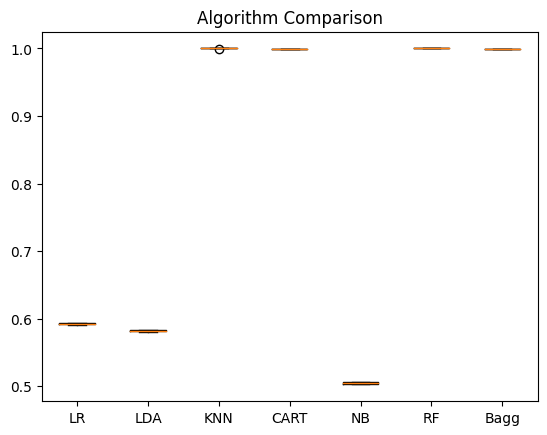

In [51]:
#SMOTE
num_trees = 100

# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('RF', RandomForestClassifier()))
#models.append(('ETC', ExtraTreesClassifier()))
models.append(('Bagg', BaggingClassifier(base_estimator=DecisionTreeClassifier())))
models.append(('AdaBoost', AdaBoostClassifier(n_estimators=num_trees)))
#models.append(('GradBoost', GradientBoostingClassifier(n_estimators=num_trees)))

#models.append(('NN', MLPRegressor(hidden_layer_sizes=(100 ), activation='relu', solver='adam', random_state=42)))
#models.append(('SVM', SVC(gamma='auto')))

# evaluate each model in turn
results = []
names = []
for name, model in models:
 kfold = StratifiedKFold(n_splits=5, random_state=1, shuffle=True)
 cv_results = cross_val_score(model, X_train_s, Y_train_s, cv=kfold, scoring='accuracy')
 results.append(cv_results)
 names.append(name)
 print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

# Compare Algorithms
pyplot.boxplot(results, labels=names)
pyplot.title('Algorithm Comparison')
pyplot.show()

In [55]:
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

# Train a random forest classifier
clf = RandomForestClassifier()
clf.fit(X_train_s, Y_train_s)

# Use calibrated classification to address bias
calibrated_clf = CalibratedClassifierCV(clf, cv=5, method='sigmoid')
calibrated_clf.fit(X_train_s, Y_train_s)

# Make predictions and evaluate performance
y_pred_s = calibrated_clf.predict(X_test_s)
accuracy = accuracy_score(Y_test_s, y_pred_s)
confusion_mat = confusion_matrix(Y_test_s, y_pred_s)

print("Accuracy:", accuracy)
print("Confusion matrix:", confusion_mat)

Accuracy: 1.0
Confusion matrix: [[44448     0     0]
 [    0 44448     0]
 [    0     0 44448]]


In [40]:
from sklearn.model_selection import GridSearchCV

model = RandomForestClassifier(random_state=42)

param_grid = { 
    'n_estimators': [100, 200, 300],
    #'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [2,4,6,8],
    'criterion' :['gini', 'entropy']
    #'min_samples_split': [2, 5, 10],
    #\'min_samples_leaf': [1, 2, 4],
    #'bootstrap': [True, False]
}

CV_rfc = GridSearchCV(estimator=model, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train_s, Y_train_s)

CV_rfc.best_params_

{'criterion': 'entropy', 'max_depth': 8, 'n_estimators': 300}

In [42]:
# Make predictions on validation dataset
model = RandomForestClassifier(random_state=42, n_estimators= 300, max_depth=8, criterion='entropy')
model.fit(X_train_s, Y_train_s)
predictions = model.predict(X_test_s)

# Evaluate predictions
print(accuracy_score(Y_test_s, predictions))
print(confusion_matrix(Y_test_s, predictions))
print(classification_report(Y_test_s, predictions))

0.9348827093832494
[[41581   408  2459]
 [ 1076 38892  4480]
 [  155   105 44188]]
              precision    recall  f1-score   support

           0       0.97      0.94      0.95     44448
           1       0.99      0.88      0.93     44448
           2       0.86      0.99      0.92     44448

    accuracy                           0.93    133344
   macro avg       0.94      0.93      0.94    133344
weighted avg       0.94      0.93      0.94    133344



LR: 0.591937 (0.000991)
LDA: 0.582096 (0.001163)
KNN: 0.999983 (0.000016)
CART: 0.999509 (0.000097)
NB: 0.504560 (0.001642)
RF: 1.000000 (0.000000)
Bagg: 0.999844 (0.000048)


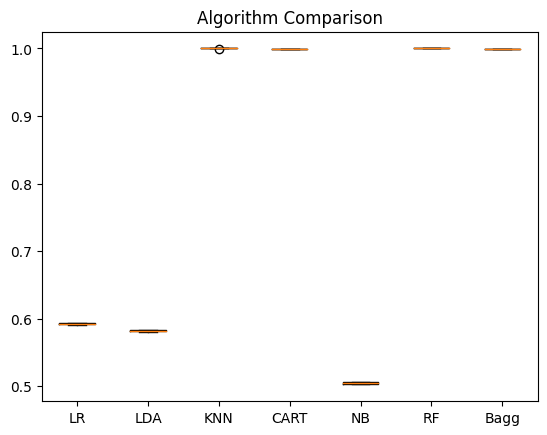

In [52]:
#ADSYN
num_trees = 100

# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('RF', RandomForestClassifier()))
#models.append(('ETC', ExtraTreesClassifier()))
models.append(('Bagg', BaggingClassifier(base_estimator=DecisionTreeClassifier())))
models.append(('AdaBoost', AdaBoostClassifier(n_estimators=num_trees)))
#models.append(('GradBoost', GradientBoostingClassifier(n_estimators=num_trees)))

#models.append(('NN', MLPRegressor(hidden_layer_sizes=(100 ), activation='relu', solver='adam', random_state=42)))
#models.append(('SVM', SVC(gamma='auto')))

# evaluate each model in turn
results = []
names = []
for name, model in models:
 kfold = StratifiedKFold(n_splits=5, random_state=1, shuffle=True)
 cv_results = cross_val_score(model, X_train_a, Y_train_a, cv=kfold, scoring='accuracy')
 results.append(cv_results)
 names.append(name)
 print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

# Compare Algorithms
pyplot.boxplot(results, labels=names)
pyplot.title('Algorithm Comparison')
pyplot.show()

In [38]:
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

# Train a random forest classifier
clf = RandomForestClassifier()
clf.fit(X_train_a, Y_train_a)

# Use calibrated classification to address bias
calibrated_clf = CalibratedClassifierCV(clf, cv=5, method='sigmoid')
calibrated_clf.fit(X_train_a, Y_train_a)

# Make predictions and evaluate performance
y_pred_a = calibrated_clf.predict(X_test_a)
accuracy = accuracy_score(Y_test_a, y_pred_a)
confusion_mat = confusion_matrix(Y_test_a, y_pred_a)

print("Accuracy:", accuracy)
print("Confusion matrix:", confusion_mat)

Accuracy: 1.0
Confusion matrix: [[44487     0     0]
 [    0 44448     0]
 [    0     0 44438]]


In [41]:
from sklearn.model_selection import GridSearchCV

model = RandomForestClassifier(random_state=42)

param_grid = { 
    'n_estimators': [100, 200, 300],
    #'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [2,4,6,8],
    'criterion' :['gini', 'entropy']
    #'min_samples_split': [2, 5, 10],
    #\'min_samples_leaf': [1, 2, 4],
    #'bootstrap': [True, False]
}

CV_rfc = GridSearchCV(estimator=model, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train_a, Y_train_a)

CV_rfc.best_params_

{'criterion': 'entropy', 'max_depth': 8, 'n_estimators': 300}

In [43]:
# Make predictions on validation dataset
model = RandomForestClassifier(random_state=42, n_estimators= 300, max_depth=8, criterion='entropy')
model.fit(X_train_a, Y_train_a)
predictions = model.predict(X_test_a)

# Evaluate predictions
print(accuracy_score(Y_test_a, predictions))
print(confusion_matrix(Y_test_a, predictions))
print(classification_report(Y_test_a, predictions))

0.9497649449288836
[[42924   142  1421]
 [ 1701 39995  2752]
 [  483   201 43754]]
              precision    recall  f1-score   support

           0       0.95      0.96      0.96     44487
           1       0.99      0.90      0.94     44448
           2       0.91      0.98      0.95     44438

    accuracy                           0.95    133373
   macro avg       0.95      0.95      0.95    133373
weighted avg       0.95      0.95      0.95    133373

